In [30]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import xarray as xr
import cmaps

import geocat.datafiles as gdf
import geocat.viz as gv

def add_cyclic(data):
    import geocat.viz as gv
    return gv.xr_add_cyclic_longitudes(data,'longitude')

min_lon=0
max_lon=360
min_lat=-90
max_lat=90

min_lat=20
max_lat=90

syr     = 1993
eyr     = 2015

rag= xr.open_dataset('./data/rag_post.nc')
bias= xr.open_dataset('./data/bias_post.nc')
acc= xr.open_dataset('./data/acc_post.nc')
rmse= xr.open_dataset('./data/rmse_post.nc')

reg_ot2m=rag['JRA_rag']
reg_mt2m_gc2=rag['GloSea5_rag']
reg_mt2m_gc32=rag['GloSea6_rag']

mt2m3_cdiff_gc2=bias['GloSea5_diff']
mt2m3_cdiff_gc32=bias['GloSea6_diff']

t2m3_acc_gc2=acc['GloSea5_acc']
tkc3_smap_gc2=acc['GloSea5_smap']
t2m3_acc_gc32=acc['GloSea6_acc']
tkc3_smap_gc32=acc['GloSea6_smap']

t2m3_rmse_gc2=rmse['GloSea5_rmse']
t2m3_rmse_gc32=rmse['GloSea6_rmse']

mt2m3_cdiff_gc2=add_cyclic(mt2m3_cdiff_gc2)
mt2m3_cdiff_gc32=add_cyclic(mt2m3_cdiff_gc32)

t2m3_acc_gc2=add_cyclic(t2m3_acc_gc2)
tkc3_smap_gc2=add_cyclic(tkc3_smap_gc2)
t2m3_acc_gc32=add_cyclic(t2m3_acc_gc32)
tkc3_smap_gc32=add_cyclic(tkc3_smap_gc32)

t2m3_rmse_gc2=add_cyclic(t2m3_rmse_gc2)
t2m3_rmse_gc32=add_cyclic(t2m3_rmse_gc32)

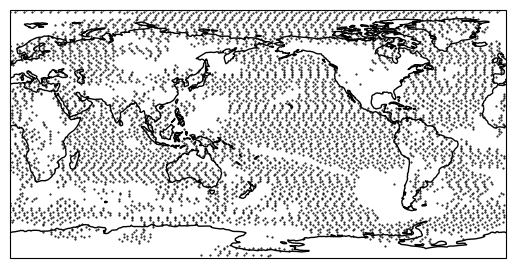

In [120]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
ax.coastlines()
lon=tkc3_smap_gc2['longitude']
lat=tkc3_smap_gc2['latitude']
data=tkc3_smap_gc2.data

significance_threshold = 0.05

significant_points = tkc3_smap_gc2 <= significance_threshold

lon2d, lat2d = np.meshgrid(lon, lat)
levels = np.arange(0, 0.06, 0.03)
thinning_factor=5
ax.scatter(lon2d[significant_points][::thinning_factor], lat2d[significant_points][::thinning_factor], color='black', marker='.', s=1, transform=ccrs.PlateCarree())

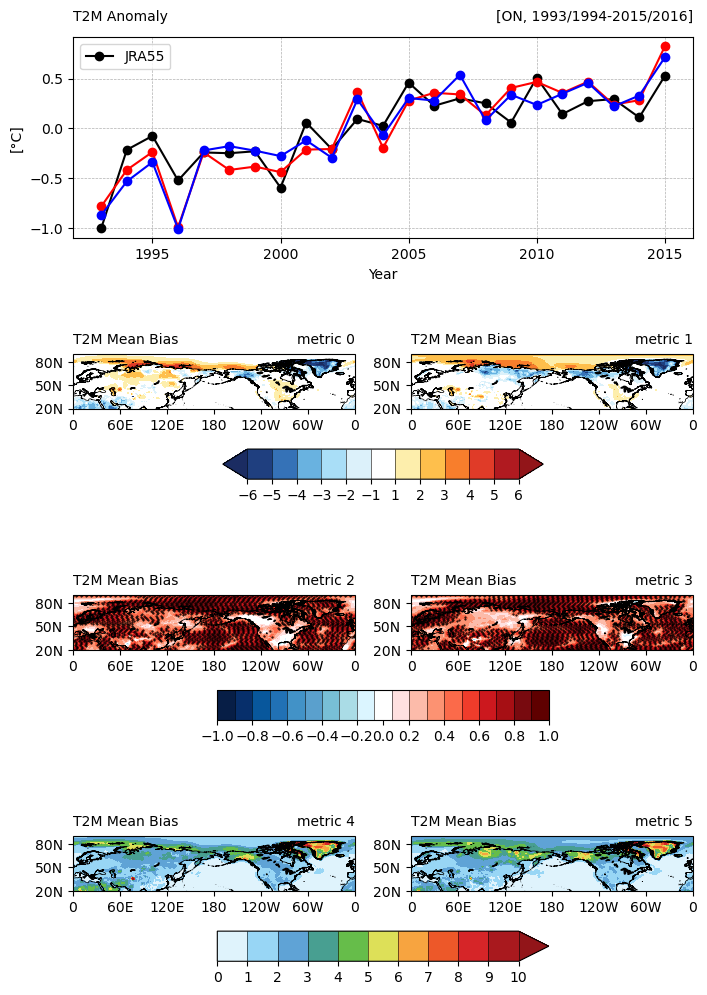

In [121]:
fig = plt.figure(figsize=(8, 12))

grid = gridspec.GridSpec(nrows=4, ncols=2, figure=fig)

# Choose the map projection
proj = ccrs.PlateCarree(central_longitude=180)

ax1 = fig.add_subplot(grid[0:1,0:2])  # upper cell of grid
ax2 = fig.add_subplot(grid[1,0], projection=proj)  # middle cell of grid
ax3 = fig.add_subplot(grid[1,1], projection=proj)  # lower cell of grid
ax4 = fig.add_subplot(grid[2,0], projection=proj)  # middle cell of grid
ax5 = fig.add_subplot(grid[2,1], projection=proj)  # lower cell of grid
ax6 = fig.add_subplot(grid[3,0], projection=proj)  # middle cell of grid
ax7 = fig.add_subplot(grid[3,1], projection=proj)  # lower cell of grid


axs=[ax2, ax3, ax4, ax5, ax6, ax7]
right_title=list(range(7))


time = np.arange(syr, eyr + 1)

ax1.plot(time, reg_ot2m, label='JRA55', color='black', marker='o')
ax1.plot(time, reg_mt2m_gc2, color='red', marker='o')
ax1.plot(time, reg_mt2m_gc32, color='blue', marker='o')

ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_xlabel('Year')  # Corrected method
ax1.set_ylabel('[°C]')  # Corrected method
gv.set_titles_and_labels(ax1,
                        lefttitle=f'T2M Anomaly',
                        righttitle=f'[ON, 1993/1994-2015/2016]',
                        lefttitlefontsize=10,
                        righttitlefontsize=10)

ax1.legend(labels=[
    'JRA55',
    # f'GloSea5 (R={cor_t2m_gc2:.2f}({dcor_t2m_gc2:.2f})/NRMSE={nrmse_t2m_gc2:.2f}({dnrmse_t2m_gc2:.2f}))',
    # f'GloSea6 (R={cor_t2m_gc32:.2f}({dcor_t2m_gc32:.2f})/NRMSE={nrmse_t2m_gc32:.2f}({dnrmse_t2m_gc32:.2f}))'
], loc='upper left')

# Adjusting the tick parameters
ax1.tick_params(axis='x', which='major')
ax1.tick_params(axis='y', which='major')



for i in range(len(axs)):
    ax=axs[i]
    # Use geocat.viz.util convenience function to set axes tick values
    ax.coastlines(resolution='10m', color='black', linewidth=0.5)
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    gv.set_axes_limits_and_ticks(ax=ax,
                                 xlim=(-180, 180),
                                 ylim=(min_lat, max_lat),
                                 yticks=np.arange(min_lat, max_lat, 30),
                                 xticks=np.arange(-180, 181, 60))

    # Use geocat.viz.util convenience function to make plots look like NCL
    # plots by using latitude, longitude tick labels
    gv.add_lat_lon_ticklabels(ax)

    # Remove the degree symbol from tick labels
    ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
    ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

    # Use geocat.viz.util convenience function to set titles
    gv.set_titles_and_labels(ax,
                             lefttitle=f'T2M Mean Bias',
                             righttitle=f'metric {right_title[i]}',
                             lefttitlefontsize=10,
                             righttitlefontsize=10)

cmap=cmaps.BlueWhiteOrangeRed
v= np.linspace(-6, 6, 13)
v=v[v!=0]

C = ax2.contourf(mt2m3_cdiff_gc2['longitude'].data,
    mt2m3_cdiff_gc2['latitude'].data,
    mt2m3_cdiff_gc2.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='both')

ax3.contourf(mt2m3_cdiff_gc32['longitude'].data,
    mt2m3_cdiff_gc32['latitude'].data,
    mt2m3_cdiff_gc32.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='both')
plt.colorbar(C,
             ax=[ax2, ax3],
             ticks=v,
             extendfrac='auto',
             aspect=9,
             drawedges=True,
             orientation='horizontal',
             pad=0.2
             )

cmap=cmaps.temp_diff_18lev
v=v = np.linspace(-1, 1, 21)
v=v[v!=0]

C2 = ax4.contourf(t2m3_acc_gc2['longitude'].data,
    t2m3_acc_gc2['latitude'].data,
    t2m3_acc_gc2.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='neither')

lon=tkc3_smap_gc2['longitude']
lat=tkc3_smap_gc2['latitude']

lon2d, lat2d = np.meshgrid(lon, lat)
thinning_factor=5

significance_threshold = 0.05
significant_points = tkc3_smap_gc2 <= significance_threshold

ax4.scatter(lon2d[significant_points][::thinning_factor], lat2d[significant_points][::thinning_factor], color='black', marker='.', s=1, transform=ccrs.PlateCarree())

ax5.contourf(t2m3_acc_gc32['longitude'].data,
    t2m3_acc_gc32['latitude'].data,
    t2m3_acc_gc32.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='neither')

significant_points = tkc3_smap_gc32 <= significance_threshold

ax5.scatter(lon2d[significant_points][::thinning_factor], lat2d[significant_points][::thinning_factor], color='black', marker='.', s=1, transform=ccrs.PlateCarree())


v=np.linspace(-1, 1, 11)

plt.colorbar(C2,
             ax=[ax4, ax5],
             ticks=v,
             extendfrac='auto',
             aspect=11,
             drawedges=True,
             orientation='horizontal',
             pad=0.2
             )



cmap=cmaps.WhiteBlueGreenYellowRed
v=v = np.linspace(0, 10, 11)

C3 = ax6.contourf(t2m3_rmse_gc2['longitude'].data,
    t2m3_rmse_gc2['latitude'].data,
    t2m3_rmse_gc2.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='max')

ax7.contourf(t2m3_rmse_gc32['longitude'].data,
    t2m3_rmse_gc32['latitude'].data,
    t2m3_rmse_gc32.data,
    transform=ccrs.PlateCarree(),
    levels=v,
    cmap=cmap,
    extend='max')

plt.colorbar(C3,
             ax=[ax6, ax7],
             ticks=v,
             extendfrac='auto',
             aspect=10,
             drawedges=True,
             orientation='horizontal',
             pad=0.2
             )

In [28]:
np.max(t2m3_acc_gc32.data)

0.9884666689533282

In [16]:
ds = xr.open_dataset(gdf.get("netcdf_files/h_avg_Y0191_D000.00.nc"),
                     decode_times=False)

<xarray.DataArray 'GloSea5_diff' (latitude: 145, longitude: 288)>
array([[-1.381058, -1.381058, -1.381058, ..., -1.381058, -1.381058, -1.381058],
       [-2.493317, -2.492416, -2.435135, ..., -2.493347, -2.48143 , -2.461685],
       [-1.249481, -1.314178, -1.129318, ..., -1.347366, -1.393219, -1.186905],
       ...,
       [ 0.753189,  0.775772,  0.768021, ...,  0.722824,  0.743744,  0.730957],
       [ 0.831558,  0.84201 ,  0.839645, ...,  0.828156,  0.825485,  0.819992],
       [ 0.860153,  0.860153,  0.860153, ...,  0.860153,  0.860153,  0.860153]],
      dtype=float32)
Coordinates:
    lev        float64 ...
  * latitude   (latitude) float32 -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    height     float64 ...

In [ ]:
fig = plt.figure(figsize=(12, 11.2), constrained_layout=True)
grid = fig.add_gridspec(ncols=2, nrows=2)
ax1 = add_axes(fig, grid[0, 0])
ax2 = add_axes(fig, grid[0, 1])
ax3 = add_axes(fig, grid[1, 0])
ax4 = add_axes(fig, grid[1, 1])


